In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load dataset
df = pd.read_csv("./placement.csv")
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [3]:
#Overview of the dataset
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.shape

(100, 4)

OutCome

* The data has 100 entries and 4 main col.
* In the raw dataset we dont need one col which is "Unnamed:0" or 1st col.

In [6]:
# Checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


* We dont have any null value so we can move ahead in the pre-processing step where we will only do one thing that is to remove the 1st col.

In [7]:
# preprocessing
new_df = df.iloc[:,1:]

new_df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


Text(0.5, 1.0, 'CGPA v/s IQ')

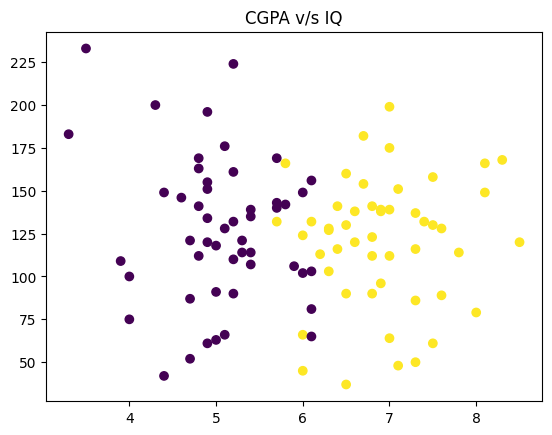

In [9]:
# EDA
import matplotlib.pyplot as plt

#ploting the graph btw cgpa v/s iq
plt.scatter(new_df['cgpa'], new_df['iq'], c=new_df['placement'])
plt.title("CGPA v/s IQ")

After EDA and other preprocessing I need to evaluate the perfect condition/model that can do my task. 
We dont need freature slection

The model can find hidden trends and learn from data given in csv file and gives the output for new data input.

Here we will use Logistic regression where we have classification algo which is one of the ML algoritham.

In [16]:
# Extracting Inout and Output from the data set for our model

X = new_df.iloc[:,:2]

Y = new_df.iloc[:,-1]


In [20]:
X # 2D Tensor

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [21]:
Y # 1D tensor

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [23]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1) # 0.1 which is 10% of my data will be used in testing and remaining will be in training

In [24]:
X_train

,cgpa,iq
86,5.1,128.0
19,5.2,132.0
50,3.5,233.0
64,7.0,64.0
68,4.0,75.0
...,...,...
61,7.3,137.0
98,6.3,103.0
46,5.3,114.0
26,7.0,199.0


In [25]:
Y_train

86    0
19    0
50    0
64    1
68    0
     ..
61    1
98    1
46    0
26    1
76    0
Name: placement, Length: 90, dtype: int64

In [26]:
X_test

,cgpa,iq
48,6.6,138.0
75,4.8,169.0
4,5.8,142.0
89,4.9,151.0
88,4.4,149.0
73,4.9,61.0
10,6.0,45.0
44,7.5,61.0
5,7.1,48.0
14,6.1,103.0


In [27]:
Y_test

48    1
75    0
4     0
89    0
88    0
73    0
10    1
44    1
5     1
14    0
Name: placement, dtype: int64

In [28]:
# scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.79172564,  0.06606772],
       [-0.70482893,  0.16992964],
       [-2.18207312,  2.79244318],
       [ 0.85931198, -1.59572303],
       [-1.74758953, -1.31010274],
       [ 1.20689885,  0.16992964],
       [ 0.85931198, -0.34937997],
       [ 0.25103496,  0.06606772],
       [-0.96551908, -0.14165612],
       [ 0.59862183,  0.74117022],
       [ 0.42482839,  0.11799868],
       [ 0.42482839,  0.8969631 ],
       [ 1.9889693 ,  1.10468694],
       [ 0.42482839, -0.92062054],
       [ 0.68551855, -0.06375968],
       [ 0.42482839, -2.296791  ],
       [-0.87862236, -0.19358708],
       [-1.0524158 ,  0.40361897],
       [ 0.25103496,  0.04010224],
       [-0.70482893, -0.92062054],
       [-2.35586655,  1.49416915],
       [ 0.07724153,  0.16992964],
       [-0.61793221, -0.11569064],
       [ 0.59862183,  1.46820367],
       [ 1.81517587,  0.61134281],
       [-0.53103549,  0.35168801],
       [-0.70482893, -0.40131093],
       [ 0.33793168,  0.40361897],
       [-1.0524158 ,

In [30]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.51172511,  0.32572253],
       [-1.0524158 ,  1.13065242],
       [-0.18344862,  0.42958445],
       [-0.96551908,  0.66327377],
       [-1.40000266,  0.61134281],
       [-0.96551908, -1.67361947],
       [-0.00965519, -2.08906716],
       [ 1.29379556, -1.67361947],
       [ 0.9462087 , -2.01117072],
       [ 0.07724153, -0.58306929]])

In [31]:
# Model selection and train it
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

In [33]:
#Model train
# Fit method is used to train data
clf.fit(X_train,Y_train) # passing training dataset in the ()

LogisticRegression()

In [35]:
# Testing / Model elvuation
Y_pred = clf.predict(X_test)
Y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [36]:
Y_test

48    1
75    0
4     0
89    0
88    0
73    0
10    1
44    1
5     1
14    0
Name: placement, dtype: int64

In [37]:
# Accuracy matrix of my model
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_pred)

0.8

<AxesSubplot:>

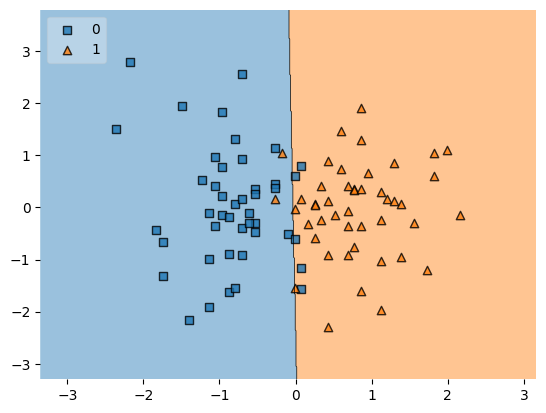

In [40]:
# how to plot dicission boundries
from mlxtend.plotting import plot_decision_regions
     

plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [41]:
# Exporting the model for website use
import pickle

pickle.dump(clf, open("model.pkl", "wb"))

The accracy is 80%